### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

>The color of the words are the independent the variable. Nothing changes these variables if we change another variable.

>The dependent variable is the congruency of the words (the semantic). If we change the independent variables (the color) the congruency of the words (the semantic) changes.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

>The null hypotheses is the condition we think is "a priori" true.In this case there will be no difference in population means of response time under inconguent and congruent conditions. (In this case we support there will be no color effect, no "Stroop Effect"). 

>Then the alternative hypothesis will be what we think it could be the right answer (what we want to proof). In this case the population mean of the response time under incongruent condition is larger than the response time under congruent conditions.(In this case we support there will be a color effect and a verified "Stroop Effect").

>Null Hypothesis (H0): 

>H0: μC = μI


>Alternative Hypothesis (Ha):

>Ha: μC < μI.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

>First of all I import some packages that I think could be helpful for this project.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

>The second step is to open the dataset and have a general view of the data.

In [2]:
csv_file = "stroopdata.csv"
df2 = pd.read_csv(csv_file)
df2.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


>As we see, the data set is in its header not very complex. Two columns with "congruent" and "incongruent" values. Each row represents an individual.The values represents the time that each individual has spent for answering. The column "congruent" shows the time spent when the color matches to the semantic of the word and the column "incongruent" shows the time spent when color and semantic of the word doesn´t match.

>Now, what I want to know next, is the total population (individuals) participating in this test. Each row in the dataset is an individual. 

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


>The dataset is not very large, 24 rows. So that the test has been done to 24 individuals.

>Taking into consideration that each row represents an individual of the study, what I want to know is, how much time has spent each individual more when the color doesn´t match ("incogruent") regarding to the time spent when the color matches ("congruent").


In [4]:
df2["Difference"] = df2["Incongruent"] - df2['Congruent']
df2

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


>Now I want to take a look to the minimum of the differences.

In [5]:
df2["Difference"].min()

1.9499999999999993

>This is very interesting. All the differences are positive. It shows that in an "incongruent" environment the time spent answering is higher than in an "congruent" environment. Now I want to see the mean of time spent more in "incongruent" conditions.

In [6]:
df2["Difference"].mean()

7.9647916666666658

>And now the maximum difference.

In [7]:
df2["Difference"].max()

21.919000000000004

>Now I will take a look on the percentage of time spent more by each individual for answering under "incongruent" conditions.

In [8]:
df2["Percentage"] = (df2["Difference"] / df2['Congruent'])*100
df2

,Congruent,Incongruent,Difference,Percentage
0,12.079,19.278,7.199,59.599305
1,16.791,18.741,1.950,11.613364
2,9.564,21.214,11.650,121.810958
3,8.630,15.687,7.057,81.772885
4,14.669,22.803,8.134,55.450269
5,12.238,20.878,8.640,70.599771
6,14.692,24.572,9.880,67.247482
7,8.987,17.394,8.407,93.546233
8,9.401,20.762,11.361,120.848846
9,14.480,26.282,11.802,81.505525


In [9]:
df2["Percentage"].min()

9.8351845216768083

>What we see here is that the minimum percentage of time spending answering in "incongruent" conditions is at least aprox. 10% higher than in "congruent" conditions.

In [10]:
df2["Percentage"].mean()

63.416210723657457

In [11]:
df2["Percentage"].max()

177.20915191203815

>And in "incongruent" conditions we have results above 177% in time spent more than in "congruent" conditions.

In [12]:
prop = (df2["Difference"].sum() / df2["Congruent"].sum())*100
prop

56.684369875484464

>While the mean of all the sample is about 57% of time spent more in "incongruent" conditions.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

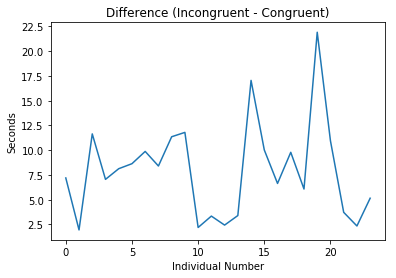

In [13]:
plt.plot(df2["Difference"])
plt.title("Difference (Incongruent - Congruent)")
plt.ylabel("Seconds")
plt.xlabel("Individual Number");

>In this visualization what we see is how the Difference is distributed for each individual. The first row is represented in the x-axis with 0.

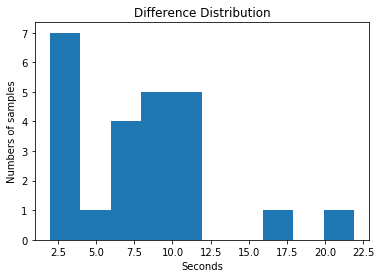

In [14]:
plt.hist(df2["Difference"])
plt.title("Difference Distribution")
plt.ylabel("Numbers of samples")
plt.xlabel("Seconds");

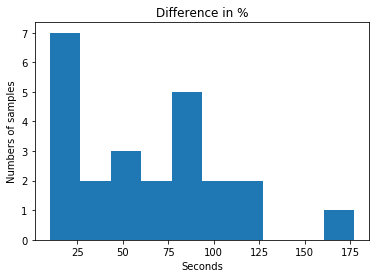

In [15]:
plt.hist(df2["Percentage"])
plt.title("Difference in %")
plt.ylabel("Numbers of samples")
plt.xlabel("Seconds");

In this visualization we can take a look of the distribution of number of individuals concerning the difference of time spent in % between "congruent" and "incongruent" . What we see is that none of the samples is lower than zero. So that under "incongruent" conditions the individuals tested showed a worser behaviour concerning the speed of answering right if we compare it to the same individuals under "congruent" conditions.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

>I choose the t-test, beacuse this type of test let me compare two averages and also tells us the probability that this happens again if we repeat the test. The t-score (=statistic) will show us the difference between the two averages. The larger the t-score the greater the difference between the groups analyzed and the p_value gives us the probability that this results is repeated again.

>In this case we use the t-test with dependent samples that compares the means for our two groups ("incongruent"/"congruent").

In [16]:
stats.ttest_rel(df2["Congruent"], df2["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

>Our results give us a high t-score (the minus doesn´t reflex a low value, only the direction of the difference) and a very low p-value. So that we can assume that a high score in the t-score reflects what we saw before a great difference between the average of the two samples (congruent/incongruent) and a great probability to achieve the same results in the future if we try the test again, because of the low p-value.

>These results are refusing the null-hypothesis, because the null hypothesis would be validate with a low t-test-score, that would represent a low differences. The high difference validates the alternative hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

>The effect observed is a phenomenon caused by the different way we process the information in the brain. The linguistic part of the information is processed in a different brain area than the we process the colors, so that reading is an automated brain process, while thinking about colors is a more consciouss activity.

>Effect like this could probably be seen when we compare no automated vs. automated activities done by humans. Like doing things with the opposite body side we are accostumed to. Like writing with the other hand, jumping with the other leg, playing football, basket or tenis...

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', "Test a Perceptual Phenomenon.ipynb"])

0